<a href="https://colab.research.google.com/github/e-abtahi/Computer_Vision_Portfolio/blob/main/Project_Plant_Seedling_Classification/Plant_Seedling_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Label.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

####**Note: Please use GPU runtime to execute the code efficiently**

## Importing necessary libraries

In [ ]:
# Importing os for command line Operations
import os

# Importing numpy for Matrix Operations
import numpy as np

# Importing pandas to read CSV files
import pandas as pd

# Importting matplotlib for Plotting and visualizing images
import matplotlib.pyplot as plt

# Importing math module to perform mathematical operations
import math

# Importing openCV for image processing
import cv2

# Importing seaborn to plot graphs
import seaborn as sns

# Tensorflow modules
import tensorflow as tf

# Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Importing the sequential module to define a sequential model
from tensorflow.keras.models import Sequential

# Defining all the layers to build our CNN Model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization

# Importing the optimizers which can be used in our model
from tensorflow.keras.optimizers import Adam,SGD

# Importing the preprocessing module to preprocess the data
from sklearn import preprocessing

# Importing train_test_split function to split the data into train and test
from sklearn.model_selection import train_test_split

# Importing confusion_matrix to plot the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer

# Display images using OpenCV
# Importing cv2_imshow from google.patches to display images
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
import random

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [ ]:
# Mounting Google drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the image file of dataset
images = np.load('/content/drive/MyDrive/images.npy')      # Complete the code to read the dataset

# Load the labels file of dataset
labels = pd.read_csv('/content/drive/MyDrive/Labels.csv')  # Complete the code to read the dataset

## Data Overview

### Understand the shape of the dataset

In [ ]:
# Checking the shape of images and lables
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


### Observations

1. Images is a collection of 4750 color images, each of size 128x128 pixels.
2. labels is the dataset of 4750 items corresponding to labels of the 4750 items in Images

In [ ]:
labels.nunique()

Label    12
dtype: int64

In [ ]:
for column in labels.columns:
    print(f"Unique values in {column}: {labels[column].unique()}")

Unique values in Label: ['Small-flowered Cranesbill' 'Fat Hen' 'Shepherds Purse' 'Common wheat'
 'Common Chickweed' 'Charlock' 'Cleavers' 'Scentless Mayweed' 'Sugar beet'
 'Maize' 'Black-grass' 'Loose Silky-bent']


### Observations
There are 12 unique labels in the labels dataset namely
- Small-flowered Cranesbill
- Fat Hen
- Shepherds Purse
- Common wheat
- Common Chickweed
- Charlock
- Cleavers
- Scentless Mayweed
- Sugar beet
- Maize
- Black-grass
- Loose Silky-bent

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

### Answers

### Question 1

There are 12 different category plant images that are different due to the species of the plant, the clarity of the image, the backdrop, the angle of the shot, the level of magnification, the focus, and the hue. The categories are namely

- Small-flowered Cranesbill
- Fat Hen
- Shepherds Purse
- Common wheat
- Common Chickweed
- Charlock
- Cleavers
- Scentless Mayweed
- Sugar beet
- Maize
- Black-grass
- Loose Silky-bent

The different plant categories can be differentiated based on a variety of morphological characteristics. Each plant species has unique features that can be observed and used for identification. Here's a general description of how these plant categories might differ from each other:

- Small-flowered Cranesbill: This plant typically has small, pinkish-purple flowers with distinctively shaped leaves that are deeply lobed.

- Fat Hen: Known for its broad leaves and often white or greenish flowers, Fat Hen can grow quite tall and is commonly found in agricultural land.

- Shepherds Purse: Named for its purse-shaped seed pods, this plant has small white flowers and rosette-forming leaves at its base.

- Common Wheat: As a cereal grain, common wheat has a distinctive tall and slender form, with a "bearded" head containing the grain.

- Common Chickweed: It has small, star-shaped white flowers and leaves that are oval and opposite. It tends to grow in a dense, mat-like structure.

- Charlock: Also known as wild mustard, Charlock has bright yellow flowers and slightly hairy leaves with toothed edges.

- Cleavers: This plant is recognizable by its slender stems with whorls of narrow leaves and small white flowers. The stems and leaves can have a sticky or velcro-like feel.

- Scentless Mayweed: It resembles a typical daisy with white petals surrounding a yellow disk, but without the strong scent that other daisies have.

- Sugar Beet: This plant has large leaves that are hairy and heart-shaped, with a thick root which is cultivated for sugar production.

- Maize: Also known as corn, Maize has distinct leaves that are long and pointed, with a tall stalk that produces ears of corn with kernels.

- Black-grass: A type of grass weed, Black-grass has dark green leaves and is often found in cultivated fields.

- Loose Silky-bent: Another grass weed, it has long, slender leaves and can be identified by its "bent" or "floppy" posture.

When creating an image dataset, the photographs of these plants would capture these distinguishing features. In machine learning tasks such as image classification, algorithms would learn to recognize and differentiate between plant species based on these and potentially more subtle features that may not be as easily discernible by the human eye.

### Question 2

From the bar plot, it's evident that the dataset is imbalanced. For instance, the categories "Common Chickweed" and "Loose Silky-bent" have a significantly higher number of samples compared to other categories such as "Common wheat" and "Maize." In particular, "Loose Silky-bent" has the highest count, with over 600 samples, while "Common Chickweed" "Maize" and a few others have counts noticeably lower, in the region of 200.

This imbalance could potentially affect the performance of a machine learning model trained on this data, as it might become overly proficient at recognizing the over-represented classes while underperforming on the under-represented ones. To mitigate this, one might consider resampling techniques to even out the distribution, such as over-sampling the minority classes, under-sampling the majority classes, or applying synthetic data generation methods like data augmentation techniques or SMOTE (Synthetic Minority Over-sampling Technique).

### Plotting random images from each of the class

In [ ]:
# Defining a function to randomly plot images from each of the class
def plot_images(images,labels):
  # Number of Classes
  num_classes=10
  # Obtaing the unique classes from labels
  categories=np.unique(labels)
  keys=dict(labels['Label'])
  # Defining number of rows=3
  rows = 3
  # Defining number of columns=4
  cols = 4
  # Defining the figure size to 10x8
  fig = plt.figure(figsize=(10, 8))
  for i in range(cols):
      for j in range(rows):
          # Generating random indices from the data and plotting the images
          random_index = np.random.randint(0, len(labels))
          # Adding subplots with 3 rows and 4 columns
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)
          # Plotting the image
          ax.imshow(images[random_index, :])
          ax.set_title(keys[random_index])
  plt.show()

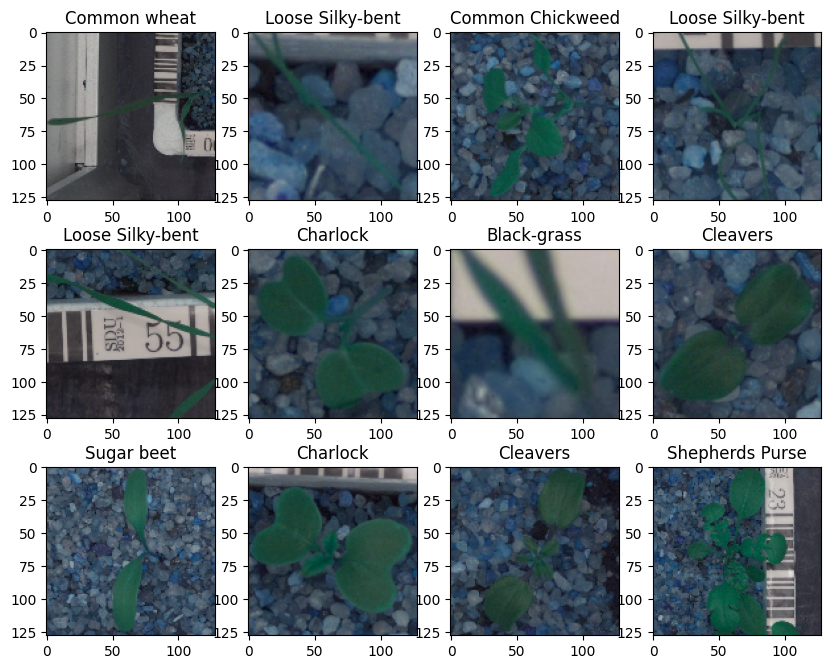

In [ ]:
# Plotting random images with their labels from each plant category
plot_images(images,labels)

### Observations

Here's a general observation of how these plant categories might differ from each other:

- Small-flowered Cranesbill: This plant typically has small, pinkish-purple flowers with distinctively shaped leaves that are deeply lobed.

- Fat Hen: Known for its broad leaves and often white or greenish flowers, Fat Hen can grow quite tall and is commonly found in agricultural land.

- Shepherds Purse: Named for its purse-shaped seed pods, this plant has small white flowers and rosette-forming leaves at its base.

- Common Wheat: As a cereal grain, common wheat has a distinctive tall and slender form, with a "bearded" head containing the grain.

- Common Chickweed: It has small, star-shaped white flowers and leaves that are oval and opposite. It tends to grow in a dense, mat-like structure.

- Charlock: Also known as wild mustard, Charlock has bright yellow flowers and slightly hairy leaves with toothed edges.

- Cleavers: This plant is recognizable by its slender stems with whorls of narrow leaves and small white flowers. The stems and leaves can have a sticky or velcro-like feel.

- Scentless Mayweed: It resembles a typical daisy with white petals surrounding a yellow disk, but without the strong scent that other daisies have.

- Sugar Beet: This plant has large leaves that are hairy and heart-shaped, with a thick root which is cultivated for sugar production.

- Maize: Also known as corn, Maize has distinct leaves that are long and pointed, with a tall stalk that produces ears of corn with kernels.

- Black-grass: A type of grass weed, Black-grass has dark green leaves and is often found in cultivated fields.

- Loose Silky-bent: Another grass weed, it has long, slender leaves and can be identified by its "bent" or "floppy" posture.


### Checking the distribution of the target variable

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Small-flowered Cranesbill'),
  Text(1, 0, 'Fat Hen'),
  Text(2, 0, 'Shepherds Purse'),
  Text(3, 0, 'Common wheat'),
  Text(4, 0, 'Common Chickweed'),
  Text(5, 0, 'Charlock'),
  Text(6, 0, 'Cleavers'),
  Text(7, 0, 'Scentless Mayweed'),
  Text(8, 0, 'Sugar beet'),
  Text(9, 0, 'Maize'),
  Text(10, 0, 'Black-grass'),
  Text(11, 0, 'Loose Silky-bent')])

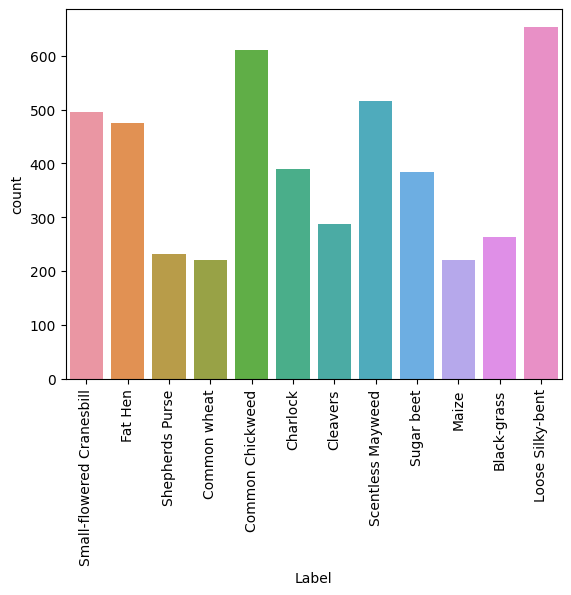

In [ ]:
# Checking for data imbalance
sns.countplot(x=labels['Label'])
plt.xticks(rotation='vertical')

### Observations

The bar plot shows the count of samples for different plant categories in the dataset. Data imbalance refers to a situation where the number of observations or samples in each class/category is not approximately equal. This can lead to a model being biased towards the classes with more observations and not performing well on classes with fewer observations.

From the bar plot, it's evident that the dataset is imbalanced. For instance, the categories "Common Chickweed" and "Loose Silky-bent" have a significantly higher number of samples compared to other categories such as "Common wheat" and "Maize." In particular, "Loose Silky-bent" has the highest count, with over 600 samples, while "Common Chickweed" "Maize" and a few others have counts noticeably lower, in the region of 200.

This imbalance could potentially affect the performance of a machine learning model trained on this data, as it might become overly proficient at recognizing the over-represented classes while underperforming on the under-represented ones. To mitigate this, one might consider resampling techniques to even out the distribution, such as over-sampling the minority classes, under-sampling the majority classes, or applying synthetic data generation methods like SMOTE (Synthetic Minority Over-sampling Technique).

## Data Pre-Processing

### Converting the BGR images to RGB images.

In [ ]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

### Resizing images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [ ]:
# Reducing the image size from 128 to 64
images_decreased = [cv2.resize(image, None,fx=0.50,fy=0.50, interpolation=cv2.INTER_LINEAR) for image in images]

**Image before resizing**

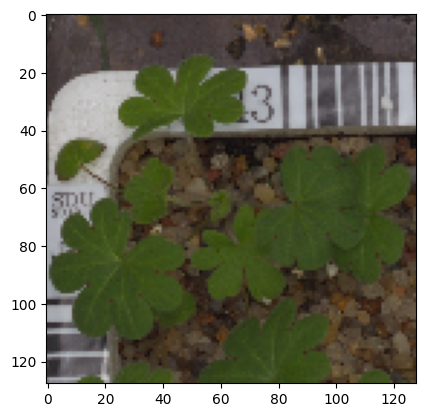

In [ ]:
plt.imshow(images[3])

**Image after resizing**

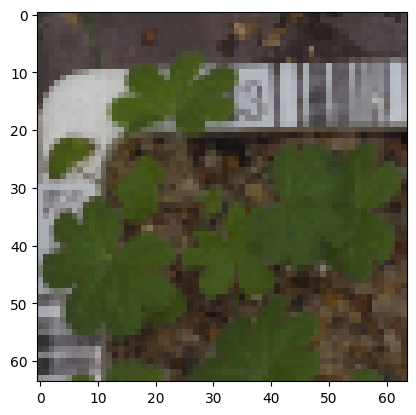

In [ ]:
plt.imshow(images_decreased[3])

### Observations

The downscaled 64x64 image appears pixelated when compared to the original 128x128 image, yet the plant's overall pattern remains recognizable in this specific instance. Nonetheless, this observation may not hold true across all images.

### Data Preparation for Modeling


- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [ ]:
# Splitting into test set first
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),labels , test_size=0.1, random_state=42,stratify=labels)

# Splitting the remaining data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp, test_size=0.1, random_state=42,stratify=y_temp)

In [ ]:
# Checking the shape of train, validation and test data
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3847, 64, 64, 3) (3847, 1)
(428, 64, 64, 3) (428, 1)
(475, 64, 64, 3) (475, 1)


### Observations

- As we have low number of images in our dataset, I only use 10% of our data for testing, 10% of our data for validation and 80% of our data for training.

### Encode the target labels

In [ ]:
# Converting labels from names to one hot vectors using a new encoding method called labelBinarizer.

# Intialize the labelBinarizer
enc = LabelBinarizer()
# Fit and transform y_train
y_train_encoded = enc.fit_transform(y_train)
# Transform y_val
y_val_encoded=enc.transform(y_val)
# Transform y_test
y_test_encoded=enc.transform(y_test)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3847, 64, 64, 3) (3847, 1)
(428, 64, 64, 3) (428, 1)
(475, 64, 64, 3) (475, 1)


In [ ]:
# Checking the shape of train, validation and test data
y_train_encoded.shape,y_val_encoded.shape,y_test_encoded.shape

((3847, 12), (428, 12), (475, 12))

### Observations

Using LabelBinarizer to transform the labels from their name form into one-hot vectors produced an array with 12 columns, each corresponding to a different plant category.

### Data Normalization

**Reshaping data into shapes compatible with Keras models**



In [ ]:
X_train = X_train.reshape(X_train.shape[0], 64, 64, 3)
X_val = X_val.reshape(X_val.shape[0], 64, 64, 3)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 3)

In [ ]:
# Normalizing the image pixels of train, test and validation data
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

### Observations
Since the image pixel values range from 0-255, my method of normalization here is scaling by dividing all the pixel values by 255 to standardize the images to have values between 0-1.

## Model Building

In [ ]:
# Clearing backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Intializing a sequential model
model1 = Sequential()

# Adding the first conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model1.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding the max pooling to reduce the size of output of first conv layer
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# Creating two similar convolution and max-pooling layers activation = relu
model1.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# Flatten the output of the conv layer after max pooling to make it ready for creating dense connections
model1.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model1.add(Dense(16, activation='relu'))
model1.add(Dropout(0.3))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model1.add(Dense(12, activation='softmax'))

# Using the Adam Optimizer
opt=Adam()

# Compiling the model using suitable metric for loss fucntion
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generate the summary of the model
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 32)          0

### Observations

- Model Type - Sequential: This indicates a linear stack of layers where each layer has exactly one input tensor and one output tensor.
- Conv2D Layers: There are three convolutional layers. The first layer has 128 filters with a kernel size (3x3), the second has 64 filters, and the third has 32 filters.
- MaxPooling2D Layers: Each Conv2D layer is followed by a MaxPooling2D layer with a kernel size (2x2). These layers reduce the spatial dimensions (height and width) of the input volume for the next layer, which reduces the number of parameters and computation in the network. They also help with making the features detected by the Conv2D layers more robust.
- Flatten Layer: The flatten layer (flatten) transforms the 2D feature maps into a 1D feature vector, preparing the data for the Dense layers.
- Dense Layers: There are two dense layers. The first dense layer is typically used for learning non-linear combinations of the high-level features represented by the output of the Flatten layer. The second dense layer, presumably, is the output layer with 12 units, suggesting the model could be used for a classification task with 12 classes.
Dropout Layer: The dropout layer (dropout) is used to prevent overfitting. It randomly sets a fraction of the input units to 0 during training.
- The model has a total of 128,828 parameters, all of which are trainable. This is a moderate size for a deep learning model, suggesting it is complex enough to capture significant patterns in the data but not excessively large to require extensive computational resources.
- The model size is around 503.23 KB, which is relatively small and efficient for deployment in environments where memory is a constraint.

<b> Fitting the model on the train data

In [ ]:
# Fitting the model on train and also using the validation data for validation
history_1 = model1.fit(
            X_train_normalized, y_train_encoded,
            epochs=50,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/50
121/121 - 14s - loss: 2.4518 - accuracy: 0.1144 - val_loss: 2.4332 - val_accuracy: 0.1285 - 14s/epoch - 119ms/step
Epoch 2/50
121/121 - 1s - loss: 2.3274 - accuracy: 0.2067 - val_loss: 2.0263 - val_accuracy: 0.3551 - 1s/epoch - 9ms/step
Epoch 3/50
121/121 - 1s - loss: 2.0292 - accuracy: 0.3031 - val_loss: 1.7738 - val_accuracy: 0.3995 - 1s/epoch - 9ms/step
Epoch 4/50
121/121 - 1s - loss: 1.8525 - accuracy: 0.3382 - val_loss: 1.6878 - val_accuracy: 0.4322 - 1s/epoch - 9ms/step
Epoch 5/50
121/121 - 1s - loss: 1.7399 - accuracy: 0.3717 - val_loss: 1.6017 - val_accuracy: 0.4720 - 1s/epoch - 9ms/step
Epoch 6/50
121/121 - 1s - loss: 1.6141 - accuracy: 0.4193 - val_loss: 1.4304 - val_accuracy: 0.5210 - 1s/epoch - 9ms/step
Epoch 7/50
121/121 - 1s - loss: 1.5930 - accuracy: 0.4359 - val_loss: 1.3391 - val_accuracy: 0.5374 - 1s/epoch - 9ms/step
Epoch 8/50
121/121 - 1s - loss: 1.4947 - accuracy: 0.4497 - val_loss: 1.3000 - val_accuracy: 0.5818 - 1s/epoch - 10ms/step
Epoch 9/50
121/121 

**Model Evaluation**

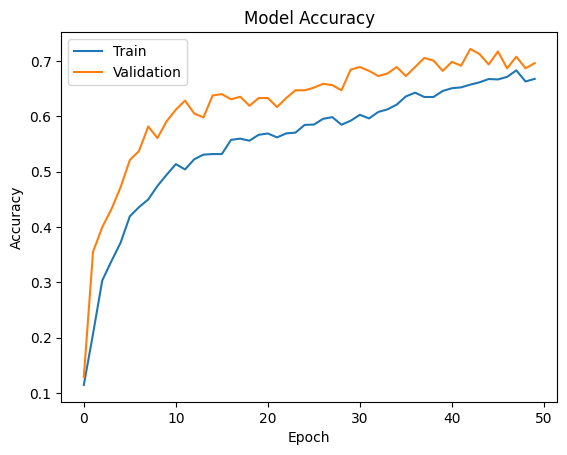

In [ ]:
# Plotting Model accuracy on the train data and validation data
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Observations

- Both training and validation accuracy increase over time, indicating that the model is learning and improving its performance on both the training and validation datasets.

- There is a gap between the training and validation accuracy and the accuracy of the model on the validation set exceeds and persistently stays above the accuracy on the training set. This trend is atypical as models generally exhibit higher accuracy on training data, often as a result of overfitting. The observed higher accuracy on the validation set in this scenario could point to a variation in how the data is distributed across the training and validation datasets. However, since the validation accuracy follows the training accuracy quite closely, it doesn't suggest a severe case of overfitting.

- Around epoch 15, the training accuracy continues to improve, while the validation accuracy starts to plateau and even slightly decreases. This is indicative of overfitting.

- The final metrics provided in the text show that the model has an accuracy of approximately 66.78% on the training set and 69.63% on the validation set after 50 epochs. The validation loss is higher than the training loss, which is expected due to overfitting.

- The final accuracy levels off at around 67% for both training and validation. While this might be acceptable depending on the difficulty of the task and the complexity of the dataset, there may be room for improvement through hyperparameter tuning, data augmentation, or using a more complex model architecture.



**Evaluate the model on test data**

In [ ]:
# Evaluating accuracy of the model on the test dataset
accuracy = model1.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 1.1155 - accuracy: 0.6989 - 167ms/epoch - 11ms/step


### Observations

The accuracy of the model on the test data is reported as 69.89%.

**Plotting the Confusion Matrix**

In [ ]:
# Here we would get the output as probablities for each category
y_pred=model1.predict(X_test_normalized)                          # Complete the code to predict the output probabilities

15/15 [==============================] - 0s 3ms/step


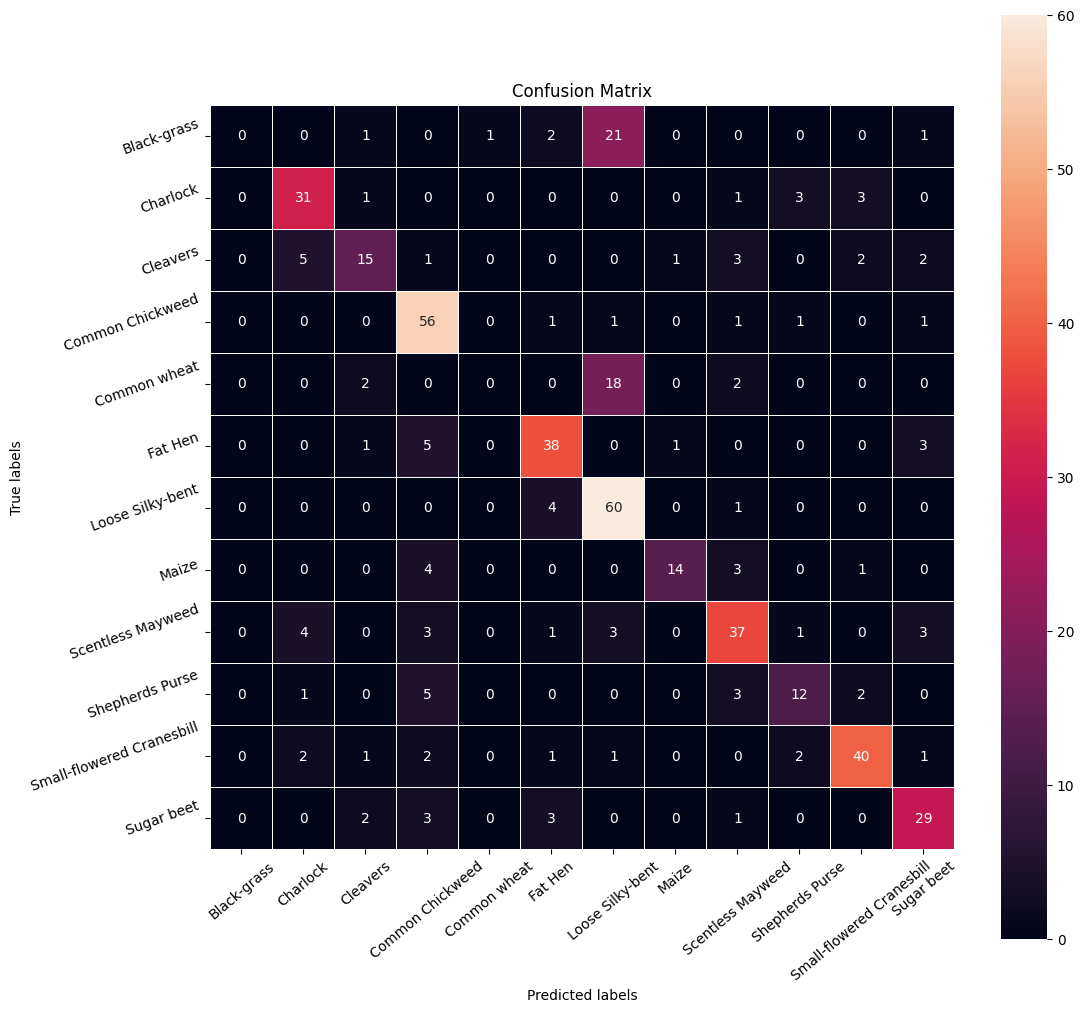

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)              # Complete the code to plot the confusion matrix
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

### Observations

- The diagonal cells represent the number of correct predictions for each class. High values on the diagonal relative to the corresponding row and column indicate good performance. In your matrix, some classes like 'Charlock', 'Common Chickweed', 'Fat Hen', 'Loose Silky-bent', and 'Sugar Beet' have high diagonal values, suggesting that the model performs well in classifying these classes.

- Off-diagonal cells show misclassifications. For example, 'Black-grass' was often misclassified as 'Loose Silky-bent', with a count of 21. Similarly, 'Common Wheat' has been frequently misclassified as 'Loose Silky-bent', with a count of 18. These off-diagonal numbers indicate where the model is confusing one class for another.

- The varying numbers across the diagonal might also suggest a class imbalance, where some classes have more samples than others, leading to better performance on the more represented classes.

- Some classes are particularly difficult for the model to distinguish. For instance, 'Black-grass' and 'Common Wheat' have more widespread misclassifications, indicating that the model struggles with these categories.

- High misclassification rates for certain pairs of classes suggest that there may be similarities in the features or insufficient distinctive features learned by the model for these classes. More distinctive features could be engineered, or techniques like Data augmentation could be used to improve the model's performance on underrepresented classes.

**Plotting Classification Report**

In [ ]:
import sklearn.metrics as metrics

# Plotting the classification report
cr=metrics.classification_report(y_test_arg,y_pred_arg)     # Complete the code to plot the classification report
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.72      0.79      0.76        39
           2       0.65      0.52      0.58        29
           3       0.71      0.92      0.80        61
           4       0.00      0.00      0.00        22
           5       0.76      0.79      0.78        48
           6       0.58      0.92      0.71        65
           7       0.88      0.64      0.74        22
           8       0.71      0.71      0.71        52
           9       0.63      0.52      0.57        23
          10       0.83      0.80      0.82        50
          11       0.72      0.76      0.74        38

    accuracy                           0.70       475
   macro avg       0.60      0.61      0.60       475
weighted avg       0.64      0.70      0.66       475



### Observations

- Overall Accuracy: The model has an accuracy of 0.70, meaning it correctly predicted 72% of the total instances across all classes.

- Macro Average: The average precision, recall, and f1-score across all classes without considering support is 0.60, 0.61, and 0.60, respectively. This metric treats all classes equally, regardless of their frequency.

- Weighted Average: The average precision, recall, and f1-score weighted by support is 0.64, 0.70, and 0.66, respectively. This metric accounts for class imbalance by giving more weight to classes with more instances.

In summary, the model performs very well for certain classes (like 1, 3, and 10) but struggles with others (like 0 and 4). Class imbalance might be a factor, as the model tends to do better on classes with more support. The overall accuracy is reasonable, but the macro average indicates there is significant variation in performance across classes. Improvements could be made by focusing on the classes with lower f1-scores and using techniques such as data augmentation.

## Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [ ]:
# Monitoring val_accuracy
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Setting the rotation_range to 20 for the ImageDataGenerator
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )

In [ ]:
# Intializing a sequential model
model2 = Sequential()

# Adding the first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
model2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model2.add(MaxPooling2D((2, 2), padding = 'same'))

model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))
model2.add(BatchNormalization())

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model2.add(Dense(16, activation='relu'))

# Adding dropout with dropout_rate=0.3
model2.add(Dropout(0.3))
# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model2.add(Dense(12, activation='softmax'))

# Initialize Adam Optimimzer
opt=Adam()
# Completing the code to Compile model
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                                  
                                                        

### Observations

- The CNN model (model2) consists of two convolutional layers with max-pooling layers in between to reduce dimensionality and parameters with a batch normalization for regularization.
It includes a flattening step, a dense layer with dropout for regularization, and an output dense layer with 12 neurons corresponding to the number of classes.
The model uses the ReLU activation function for hidden layers and softmax for the output layer.
An Adam optimizer and categorical crossentropy loss function are used for compiling the model.







<b> Fitting the model on the train data

In [ ]:
# Fitting the model on train data with batch_size=64 and epochs=30
# Epochs
epochs = 50
# Batch size
batch_size = 64

history = model2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       shuffle=False),
                                       epochs=epochs,
                                       steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                                       validation_data=(X_val_normalized,y_val_encoded),
                                       verbose=1,
                                       callbacks=[learning_rate_reduction]
                                       )

Epoch 1/50
60/60 [==============================] - 9s 123ms/step - loss: 2.1348 - accuracy: 0.2506 - val_loss: 2.4131 - val_accuracy: 0.1706 - lr: 0.0010
Epoch 2/50
60/60 [==============================] - 4s 69ms/step - loss: 1.6781 - accuracy: 0.3994 - val_loss: 2.2717 - val_accuracy: 0.2991 - lr: 0.0010
Epoch 3/50
60/60 [==============================] - 4s 71ms/step - loss: 1.4925 - accuracy: 0.4708 - val_loss: 2.2027 - val_accuracy: 0.2570 - lr: 0.0010
Epoch 4/50
60/60 [==============================] - 6s 93ms/step - loss: 1.3985 - accuracy: 0.5025 - val_loss: 2.1021 - val_accuracy: 0.5888 - lr: 0.0010
Epoch 5/50
60/60 [==============================] - 4s 68ms/step - loss: 1.2871 - accuracy: 0.5437 - val_loss: 1.8613 - val_accuracy: 0.3294 - lr: 0.0010
Epoch 6/50
60/60 [==============================] - 6s 93ms/step - loss: 1.1843 - accuracy: 0.5771 - val_loss: 1.6805 - val_accuracy: 0.5864 - lr: 0.0010
Epoch 7/50
60/60 [==============================] - 5s 82ms/step - loss: 1.

**Model Evaluation**

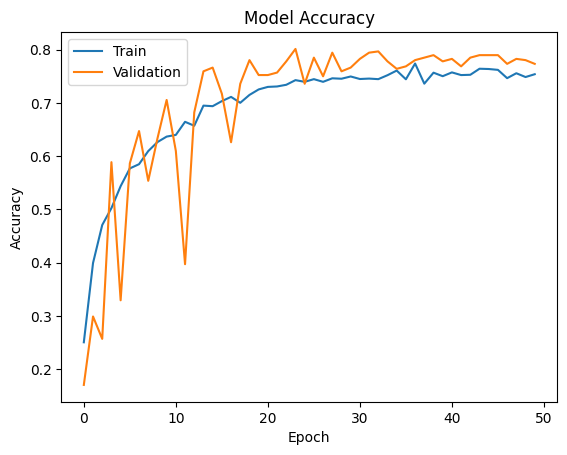

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Observations

- The graph shows that the validation accuracy surpasses and remains consistently higher than the training accuracy after a certain point. This is an unusual pattern because typically, a model performs slightly better on the training set due to overfitting. In this case, the higher validation accuracy could suggest that the data augmentation or regularization methods are very effective, or there might be a difference in the distribution of data between the training and validation sets.

- Both training and validation accuracies increase sharply at the beginning and then plateau, which is typical as the model begins to converge to a solution. However, there is noticeable volatility in validation accuracy, especially in the early epochs.

- The significant drops and subsequent recoveries in validation accuracy early in training could be due to a high learning rate or the model learning to generalize from the augmented data. This usually settles down as the model starts to converge.

- Post around 20 epochs, the accuracy for both training and validation seems to plateau with minor fluctuations. This indicates that the model is not learning significantly from additional epochs, and it may have reached its capacity given the current architecture and hyperparameters.

- The reported final metrics indicate a training accuracy of 74.46% and a validation accuracy of 78.50% at the 60th epoch which is typically a good sign of generalization, especially when data augmentation is used.

From the graph and the provided metrics, it appears that model2 with data augmentation is generalizing well, as indicated by the high validation accuracy compared to the training accuracy. The plateau in performance suggests that further training may not yield significant improvements without changes to the model architecture or training process, such as further hyperparameter tuning, more complex data augmentation, or using a transfer learning strategy.

**Evaluate the model on test data**

In [ ]:
accuracy = model2.evaluate(X_test_normalized, y_test_encoded, verbose=2)  # Complete the code to evaluate the model on test data

15/15 - 0s - loss: 0.7485 - accuracy: 0.7600 - 144ms/epoch - 10ms/step


### Observations

The accuracy of the model on the test data is reported as 76.00%.

**Plotting the Confusion Matrix**

In [ ]:
# Obtaining the output probabilities
y_pred=model2.predict(X_test_normalized)

15/15 [==============================] - 0s 2ms/step


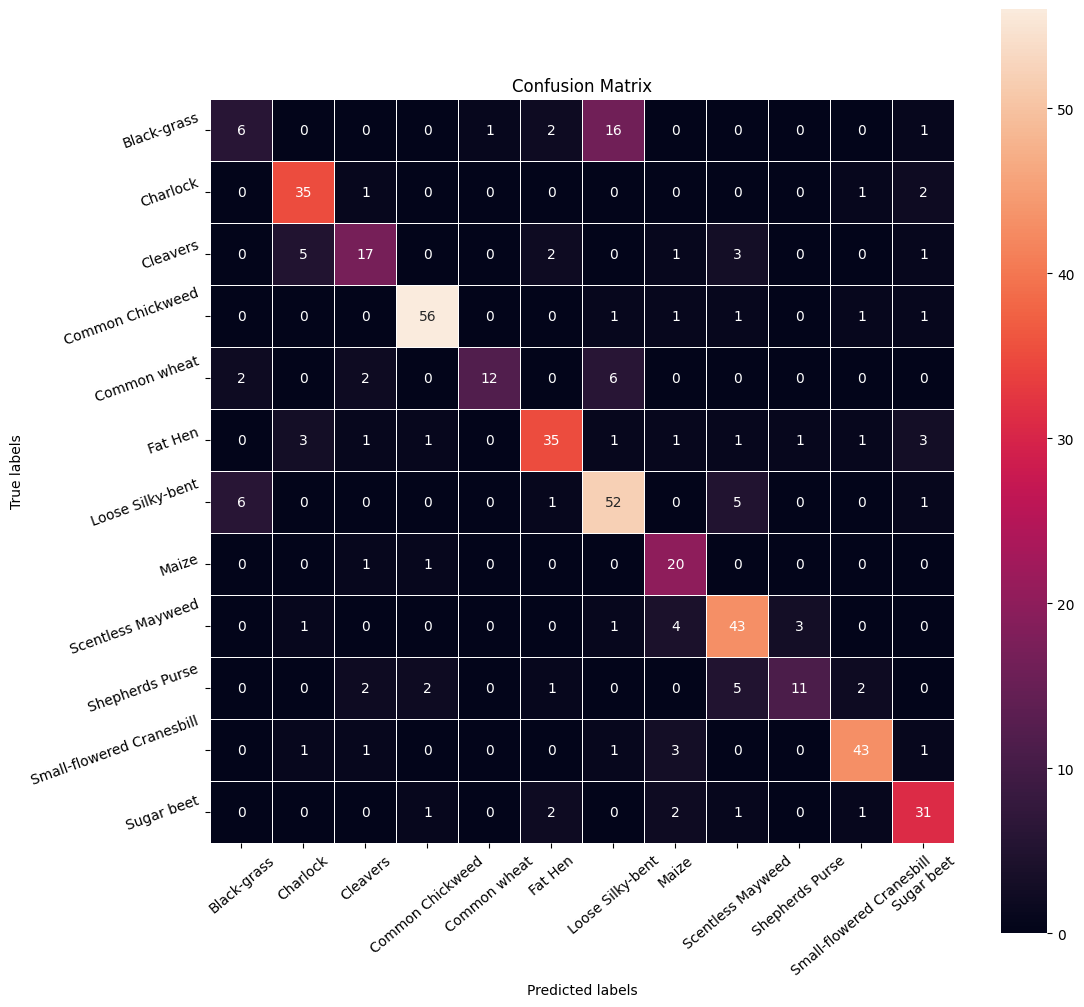

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)     # Complete the code to obatin the confusion matrix
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

### Observations

- The model seems to perform well for certain classes, such as 'Charlock', 'Common Chickweed', 'Fat Hen', 'Loose Silky-bent', 'Scentless Mayweed', and 'Sugar Beet', where the numbers on the diagonal (which indicate correct predictions) are relatively high. This suggests that the model is effectively recognizing and distinguishing these classes.

- There are some noticeable patterns of misclassification. For example, 'Loose Silky-bent' is frequently confused with 'Black-grass' and 'Common wheat'. This indicates that the model struggles to differentiate between these particular classes.

- The classes with significant misclassifications, particularly those where the number of misclassifications is high relative to the correct predictions, could be areas to focus on for improvement. This could involve additional training data, further feature engineering, or class-specific data augmentation.

In conclusion, while the model is accurate in classifying several classes, it has difficulties with others, indicating room for improvement in its classification abilities, particularly for the classes that are most often confused.








**Plotting Classification Report**

In [ ]:
# Plotting the classification report
cr=metrics.classification_report(y_test_arg,y_pred_arg)     # Complete the code to plot the classification report
print(cr)

              precision    recall  f1-score   support

           0       0.43      0.23      0.30        26
           1       0.78      0.90      0.83        39
           2       0.68      0.59      0.63        29
           3       0.92      0.92      0.92        61
           4       0.92      0.55      0.69        22
           5       0.81      0.73      0.77        48
           6       0.67      0.80      0.73        65
           7       0.62      0.91      0.74        22
           8       0.73      0.83      0.77        52
           9       0.73      0.48      0.58        23
          10       0.88      0.86      0.87        50
          11       0.76      0.82      0.78        38

    accuracy                           0.76       475
   macro avg       0.74      0.72      0.72       475
weighted avg       0.76      0.76      0.75       475



### Observations

- Overall Accuracy: The overall accuracy of the model is 0.76, meaning it correctly predicts the class 76% of the time across all predictions.

- The macro average precision, recall, and f1-score are 0.74, 0.72, and 0.72, respectively, which indicates a fairly balanced performance across classes without considering the class imbalance.

- The weighted average precision, recall, and f1-score are all around 0.75 to 0.76, which is calculated considering the support (the number of true instances for each class). This suggests that the model's performance is consistent with the class distribution in the dataset.

In conclusion, the model performs well for most classes, especially classes 1, 3, 5, 6, 8, 10, and 11. However, it has room for improvement in class 0, 4, and 9, where it either misses a significant number of actual positives (low recall) or incorrectly labels negatives as positives (lower precision). The model's overall accuracy is quite good, but the discrepancies in class-specific performances could be addressed to improve the model further.









# Transfer Learning using VGG16

- This time, I will be using the idea of **Transfer Learning**. I will be loading a pre-built architecture - **VGG16**, which was trained on the ImageNet dataset and is the runner-up in the ImageNet competition in 2014.

- For training VGG16, I will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, I will replace the existing fully-connected layers with FC layers created specifically for our problem.


In [ ]:
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16

backend.clear_session()
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (64,64,3))
vgg_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [ ]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
model3 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model3.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model3.add(Flatten())

# Adding a dense output layer
model3.add(Dense(32, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dense(16, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dense(12, activation='softmax'))
opt=Adam()
# Compile model
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 32)                65568     
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_1 (Bat  (None, 16)                64        
 chNormalization)                                       

In [ ]:
# Epochs
epochs = 30
# Batch size
batch_size = 64

history_vgg16 = model3.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                                       epochs=epochs,
                                       steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                                       validation_data=(X_val_normalized,y_val_encoded),
                                       verbose=1)

Epoch 1/30
60/60 [==============================] - 11s 120ms/step - loss: 2.2303 - accuracy: 0.2768 - val_loss: 2.4335 - val_accuracy: 0.1425
Epoch 2/30
60/60 [==============================] - 6s 104ms/step - loss: 1.7674 - accuracy: 0.4272 - val_loss: 2.0828 - val_accuracy: 0.3061
Epoch 3/30
60/60 [==============================] - 9s 145ms/step - loss: 1.5495 - accuracy: 0.4956 - val_loss: 1.9462 - val_accuracy: 0.3692
Epoch 4/30
60/60 [==============================] - 8s 132ms/step - loss: 1.3926 - accuracy: 0.5424 - val_loss: 1.6815 - val_accuracy: 0.4533
Epoch 5/30
60/60 [==============================] - 8s 129ms/step - loss: 1.2681 - accuracy: 0.5876 - val_loss: 1.5180 - val_accuracy: 0.4930
Epoch 6/30
60/60 [==============================] - 10s 166ms/step - loss: 1.1692 - accuracy: 0.6154 - val_loss: 1.3840 - val_accuracy: 0.5280
Epoch 7/30
60/60 [==============================] - 5s 79ms/step - loss: 1.0809 - accuracy: 0.6416 - val_loss: 1.5095 - val_accuracy: 0.4836
Epoch

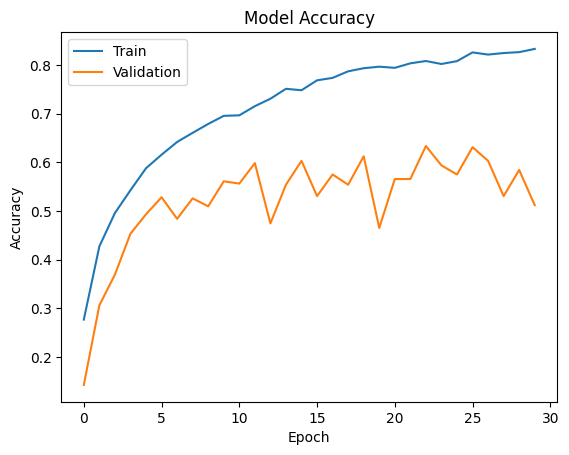

In [ ]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Observations

- The training accuracy increases consistently as the number of epochs grows, indicating that the model is effectively learning from the training data. By the 30th epoch, it has achieved an accuracy of about 83.27%, which is quite high and suggests that the model has a good fit on the training data.

- The validation accuracy initially increases but starts to fluctuate and even decreases slightly after around 10 epochs. This trend continues with significant variability, and by the 30th epoch, it settles at approximately 51.17%, which is considerably lower than the training accuracy.

- The large gap between training and validation accuracy and the fact that the validation loss is much higher than the training loss (1.6674 vs. 0.4817) indicates overfitting. The model performs well on the training data but fails to generalize effectively to unseen validation data.

- The graph suggests that the model accuracy for validation data does not improve significantly after approximately 10 epochs, implying that further training beyond this point does not yield better generalization. This could have been an optimal point for early stopping to prevent overfitting.

- VGG16 is a complex model with many parameters, making it prone to overfitting, especially if the dataset is not large enough to support such complexity.

- To address the overfitting observed, one could introduce or increase dropout, add weight regularization, collect more data, employ more aggressive data augmentation, or simplify the model. Additionally, fine-tuning the learning rate and employing learning rate decay might help.

In summary, the VGG16 model is overfitting the training data, leading to poor performance on the validation set. To improve the model's ability to generalize, various regularization techniques or adjustments to the training process should be considered.

In [ ]:
accuracy = model3.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 1s - loss: 1.8247 - accuracy: 0.5263 - 1s/epoch - 92ms/step


### Observations

The accuracy of the model on the test data is reported as 52.63%.

In [ ]:
# Here we would get the output as probablities for each category
y_pred=model3.predict(X_test_normalized)

15/15 [==============================] - 1s 18ms/step


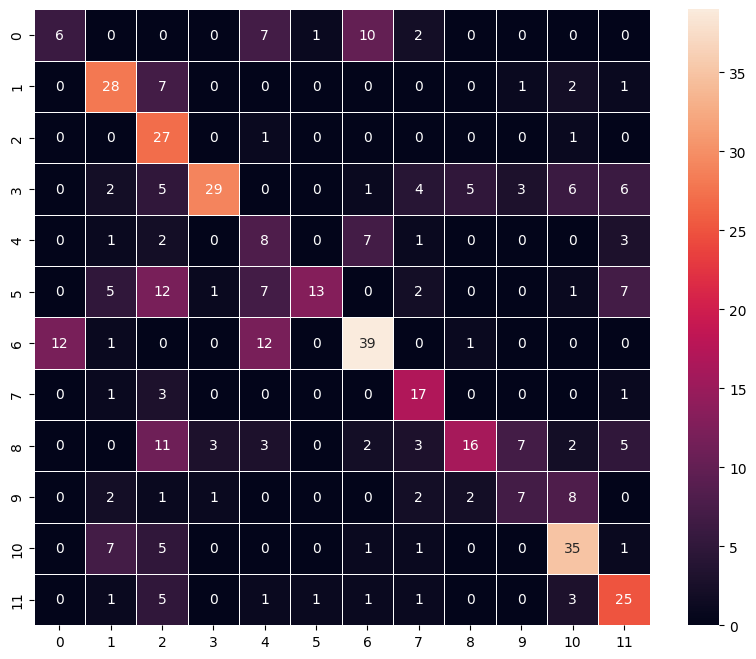

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

Compared to the earlier models, this VGG16 model seems to have higher misclassification rates for certain classes, as evident from the broader spread of non-zero values outside the diagonal. This may suggest that while the VGG16 model has a complex architecture, it may not necessarily be performing better across all classes.

- Given the high validation loss and lower validation accuracy reported earlier, the widespread misclassifications across many classes support the notion that the model is overfitting. It is not generalizing well to the validation data, which is a common issue with deep and complex models like VGG16 when trained on limited data.

- Some classes (like 1, 2, 3, and 10) do have a high number of correct predictions, indicating that the VGG16 model is capable of learning effectively but may require further tuning, more data, or regularization to improve overall performance.

In summary, while the VGG16 model may have a higher capacity due to its depth and complexity, it does not necessarily translate to better performance. It seems to suffer from overfitting, as indicated by the lower validation accuracy and higher validation loss. This model might require additional techniques to improve generalization, such as agressive data augmentation, dropout, weight regularization, or transfer learning with fine-tuning.

## Final Model

When evaluating the performance of the three models, the second model (model2) demonstrates superior overall results, which is employed in the visual representation of the predictions below. Further examination and commentary on this will be presented in the subsequent section on Practical Recommendations and Strategic Advice for the business.

### Visualizing the prediction

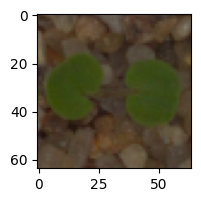

1/1 [==============================] - 0s 227ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


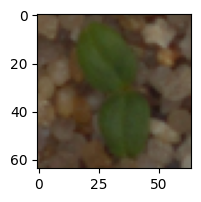

1/1 [==============================] - 0s 27ms/step
Predicted Label ['Cleavers']
True Label Cleavers


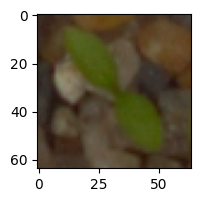

1/1 [==============================] - 0s 27ms/step
Predicted Label ['Common Chickweed']
True Label Common Chickweed


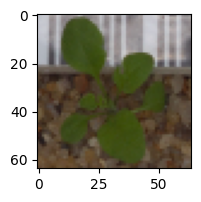

1/1 [==============================] - 0s 63ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Shepherds Purse


In [ ]:

# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[59],)
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[59].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[59])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

## Actionable Insights and Business Recommendations

Considering the problem statement of modernizing the agricultural industry through the application of AI in plant seedling classification, and evaluating the summaries and performance metrics of the three models, here are some actionable insights and business recommendations:

1. Data Augmentation Efficacy: Model2, which incorporates data augmentation, shows improved performance compared to Model1, which does not use data augmentation. Data augmentation appears to be an effective strategy to increase the diversity of the training data, which can help in improving the model's generalization capabilities. Therefore, it is recommended to continue and possibly expand the use of data augmentation techniques.

2. Model Complexity vs. Performance: While Model3 (VGG16 with data augmentation) has the highest training accuracy, its validation and test accuracies are significantly lower, indicating overfitting. This suggests that the complexity of VGG16 may not be necessary for this specific problem and that a simpler model might perform better when it comes to generalization. It's recommended to use simpler models like Model2 for deployment in real-world scenarios where generalization is key.

3. Regularization and Model Tuning: Model2 shows a good balance between training and validation accuracy, which suggests appropriate regularization. It is advisable to further tune the hyperparameters of this model, including the dropout rate and possibly employing weight decay, to achieve even better generalization.

4. Model Deployment: Given that Model2 has the best overall performance, deploying this model into a production environment would be the most prudent course of action. This model can be integrated into mobile applications for real-time plant seedling classification, which would assist workers in the agricultural sector.

5. Further Data Collection: To improve the model's accuracy and robustness, it is recommended to collect more data, especially underrepresented classes that the models struggle to predict. This would help in reducing bias and improving the model's predictive power across all classes.

6. Transfer Learning with Caution: While Model3 utilizes transfer learning with VGG16, the results show that this approach did not perform well on the validation and test sets. It is recommended to use transfer learning cautiously, potentially with different pre-trained models that are less complex and more suited to the dataset size.

7. Real-time Feedback Loop: Implement a system for real-time feedback where the agricultural workers can confirm or correct the model's predictions. This human-in-the-loop approach can be used to continuously improve the model through active learning.

8. Business Process Integration: Integrate the AI model into the existing business processes by providing training to the agricultural workers on how to use the AI tool effectively. This integration would likely increase their productivity and reduce manual labor.

9. Sustainability and Long-Term Planning: Promote the AI model's role in sustainable agricultural practices by highlighting its ability to improve crop yields and reduce environmental impact. This can be part of a broader strategy to adopt environmentally friendly technologies in agriculture.

10. Continuous Monitoring and Updates: After deploying the chosen model, continuously monitor its performance and collect data on its predictions. Use this data for periodic retraining and updating of the model to ensure that it remains accurate as the conditions and types of plants it needs to recognize evolve over time.

In summary, the deployment of Model2 seems to be the most viable option for immediate implementation, provided that the recommendations above are considered to ensure its ongoing effectiveness and integration into agricultural practices.

_____